In [1]:
#constants 
DATA_PATH = '../data/processed/1_preprocessed_data.pkl'
FEATURES_PATH = "../data/processed/features_skills_clusters.pkl"


ROLE_COLS = ['DevType']
TECH_COLS = [
            'LanguageHaveWorkedWith',
            'DatabaseHaveWorkedWith',
            'PlatformHaveWorkedWith',
            'WebframeHaveWorkedWith',
            'MiscTechHaveWorkedWith',
            'ToolsTechHaveWorkedWith',
            'NEWCollabToolsHaveWorkedWith'
]
EXPORT_PATH = '../data/processed/2_cleaned_data.pkl'

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

### _Read data and Preprocess_

In [3]:
# Read Data 
processed_data = pd.read_pickle(DATA_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [4]:
# One hot encode
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(processed_data[col]),
                               columns=binarizer.classes_,
                               index=processed_data[col].index)
    encoded_dfs[col] = encoded_df

# Merge 1-hot encoded
encoded_dfs = pd.concat(encoded_dfs, axis=1)

In [5]:
encoded_dfs

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

### _Quick sanity check_

In [6]:
# Select random int
i = np.random.randint(processed_data.shape[0])

# Print original values
print(processed_data.iloc[i][ROLE_COLS].tolist())
print(processed_data.iloc[i][TECH_COLS].tolist())
print("----------------")

# Print processed
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i] == 1])
print("----------------")

# Check clustering 
print("Clusters:",features_df.iloc[i].sum())
print("Skills:",  encoded_dfs[TECH_COLS].iloc[i].sum())

[['Developer, mobile']]
[['Assembly', 'Bash/Shell', 'C', 'C++', 'Go', 'HTML/CSS', 'Java', 'JavaScript', 'Kotlin', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Rust', 'Scala', 'SQL', 'Swift'], ['MongoDB', 'MySQL', 'SQLite'], [], ['Vue.js'], ['Apache Spark', 'Hadoop', 'TensorFlow'], ['Ansible', 'Docker', 'Git', 'Unity 3D'], ['Android Studio', 'IntelliJ', 'Neovim', 'Sublime Text', 'Vim', 'Visual Studio', 'Visual Studio Code', 'Xcode']]
----------------
DevType                       Developer, mobile     1
LanguageHaveWorkedWith        Assembly              1
                              Bash/Shell            1
                              C                     1
                              C++                   1
                              Go                    1
                              HTML/CSS              1
                              Java                  1
                              JavaScript            1
                              Kotlin                1
       

### _Exclude Roles_

In [7]:
# Exclude roles
EXCULDE_ROLES = [
    'Other (please specify):',
    'Student',
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior Executive (C-Suite, VP, etc.)',
    'Product manager',
    'Engineer, site reliability']


In [8]:
for role in EXCULDE_ROLES:
    encoded_dfs = encoded_dfs.drop(("DevType", role), axis=1)

In [9]:
# Check the total samples of roles
original_role_sum = encoded_dfs["DevType"].sum(axis=0)
original_role_sum.sort_values()

Scientist                                         2015
Developer, game or graphics                       2112
Academic researcher                               2899
Developer, QA or test                             3611
Data or business analyst                          3792
Engineer, data                                    4176
Data scientist or machine learning specialist     4273
Developer, embedded applications or devices       4598
Database administrator                            5655
System administrator                              6079
DevOps specialist                                 7058
Developer, mobile                                 9800
Developer, desktop or enterprise applications    11036
Developer, front-end                             18231
Developer, back-end                              29071
Developer, full-stack                            32891
dtype: int64

### _Filter data_

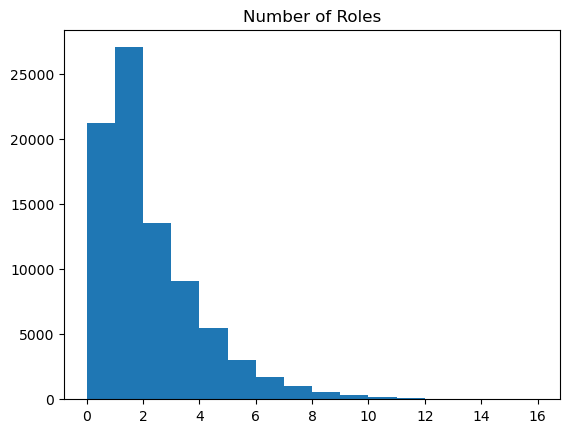

In [10]:
# frequency of Number of roles 
freq_roles = encoded_dfs[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles, freq_roles.max())
plt.title('Number of Roles')
plt.show()

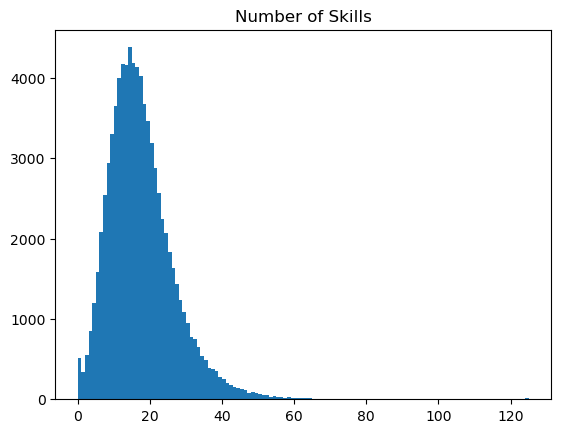

In [11]:
# frequency of number of skills
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title('Number of Skills')
plt.show()

In [12]:
# Filter frequencies 
ROLES_RANGE = [1,3]
TECH_RANGE  = [3,30]

In [13]:
# Create masks 
role_mask   = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
tech_mask   = (freq_tech >= TECH_RANGE[0])   & (freq_tech <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

In [14]:
features_df = features_df.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()

In [15]:
# Check the total samples of roles
cleaned_role_sum = encoded_dfs["DevType"].sum(axis=0)
cleaned_role_sum

Academic researcher                               1708
Data or business analyst                          1658
Data scientist or machine learning specialist     2460
Database administrator                            1210
DevOps specialist                                 3056
Developer, QA or test                             1135
Developer, back-end                              17084
Developer, desktop or enterprise applications     4845
Developer, embedded applications or devices       2138
Developer, front-end                              8932
Developer, full-stack                            20655
Developer, game or graphics                        899
Developer, mobile                                 4751
Engineer, data                                    1941
Scientist                                         1046
System administrator                              2069
dtype: int64

### _Merge & Export data_

In [16]:
# Add second level indexing 
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])

In [17]:
# Concatenate
df = pd.concat([encoded_dfs, features_df], axis=1)

In [18]:
# Export 
df.to_pickle(EXPORT_PATH)